1. Использовать будем f1, поскольку классификация с дизбалансными классами.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


data = pd.read_pickle('../data/train.pickle')
names = pd.read_csv('../data/label_names.csv')['SignName']

x = data['features']
y = data['labels']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, stratify=y)

In [2]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=100)
lr_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)

/home/sohatiy/miniconda3/envs/classical-ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [3]:
from sklearn.metrics import f1_score, confusion_matrix


lr_pred = lr_model.predict(x_test.reshape(x_test.shape[0], -1))
f1_score(lr_pred, y_test, average='weighted')

0.9240740494877436

Чтобы посмотреть на то что именно путает модель, строим матрицу ошибок.

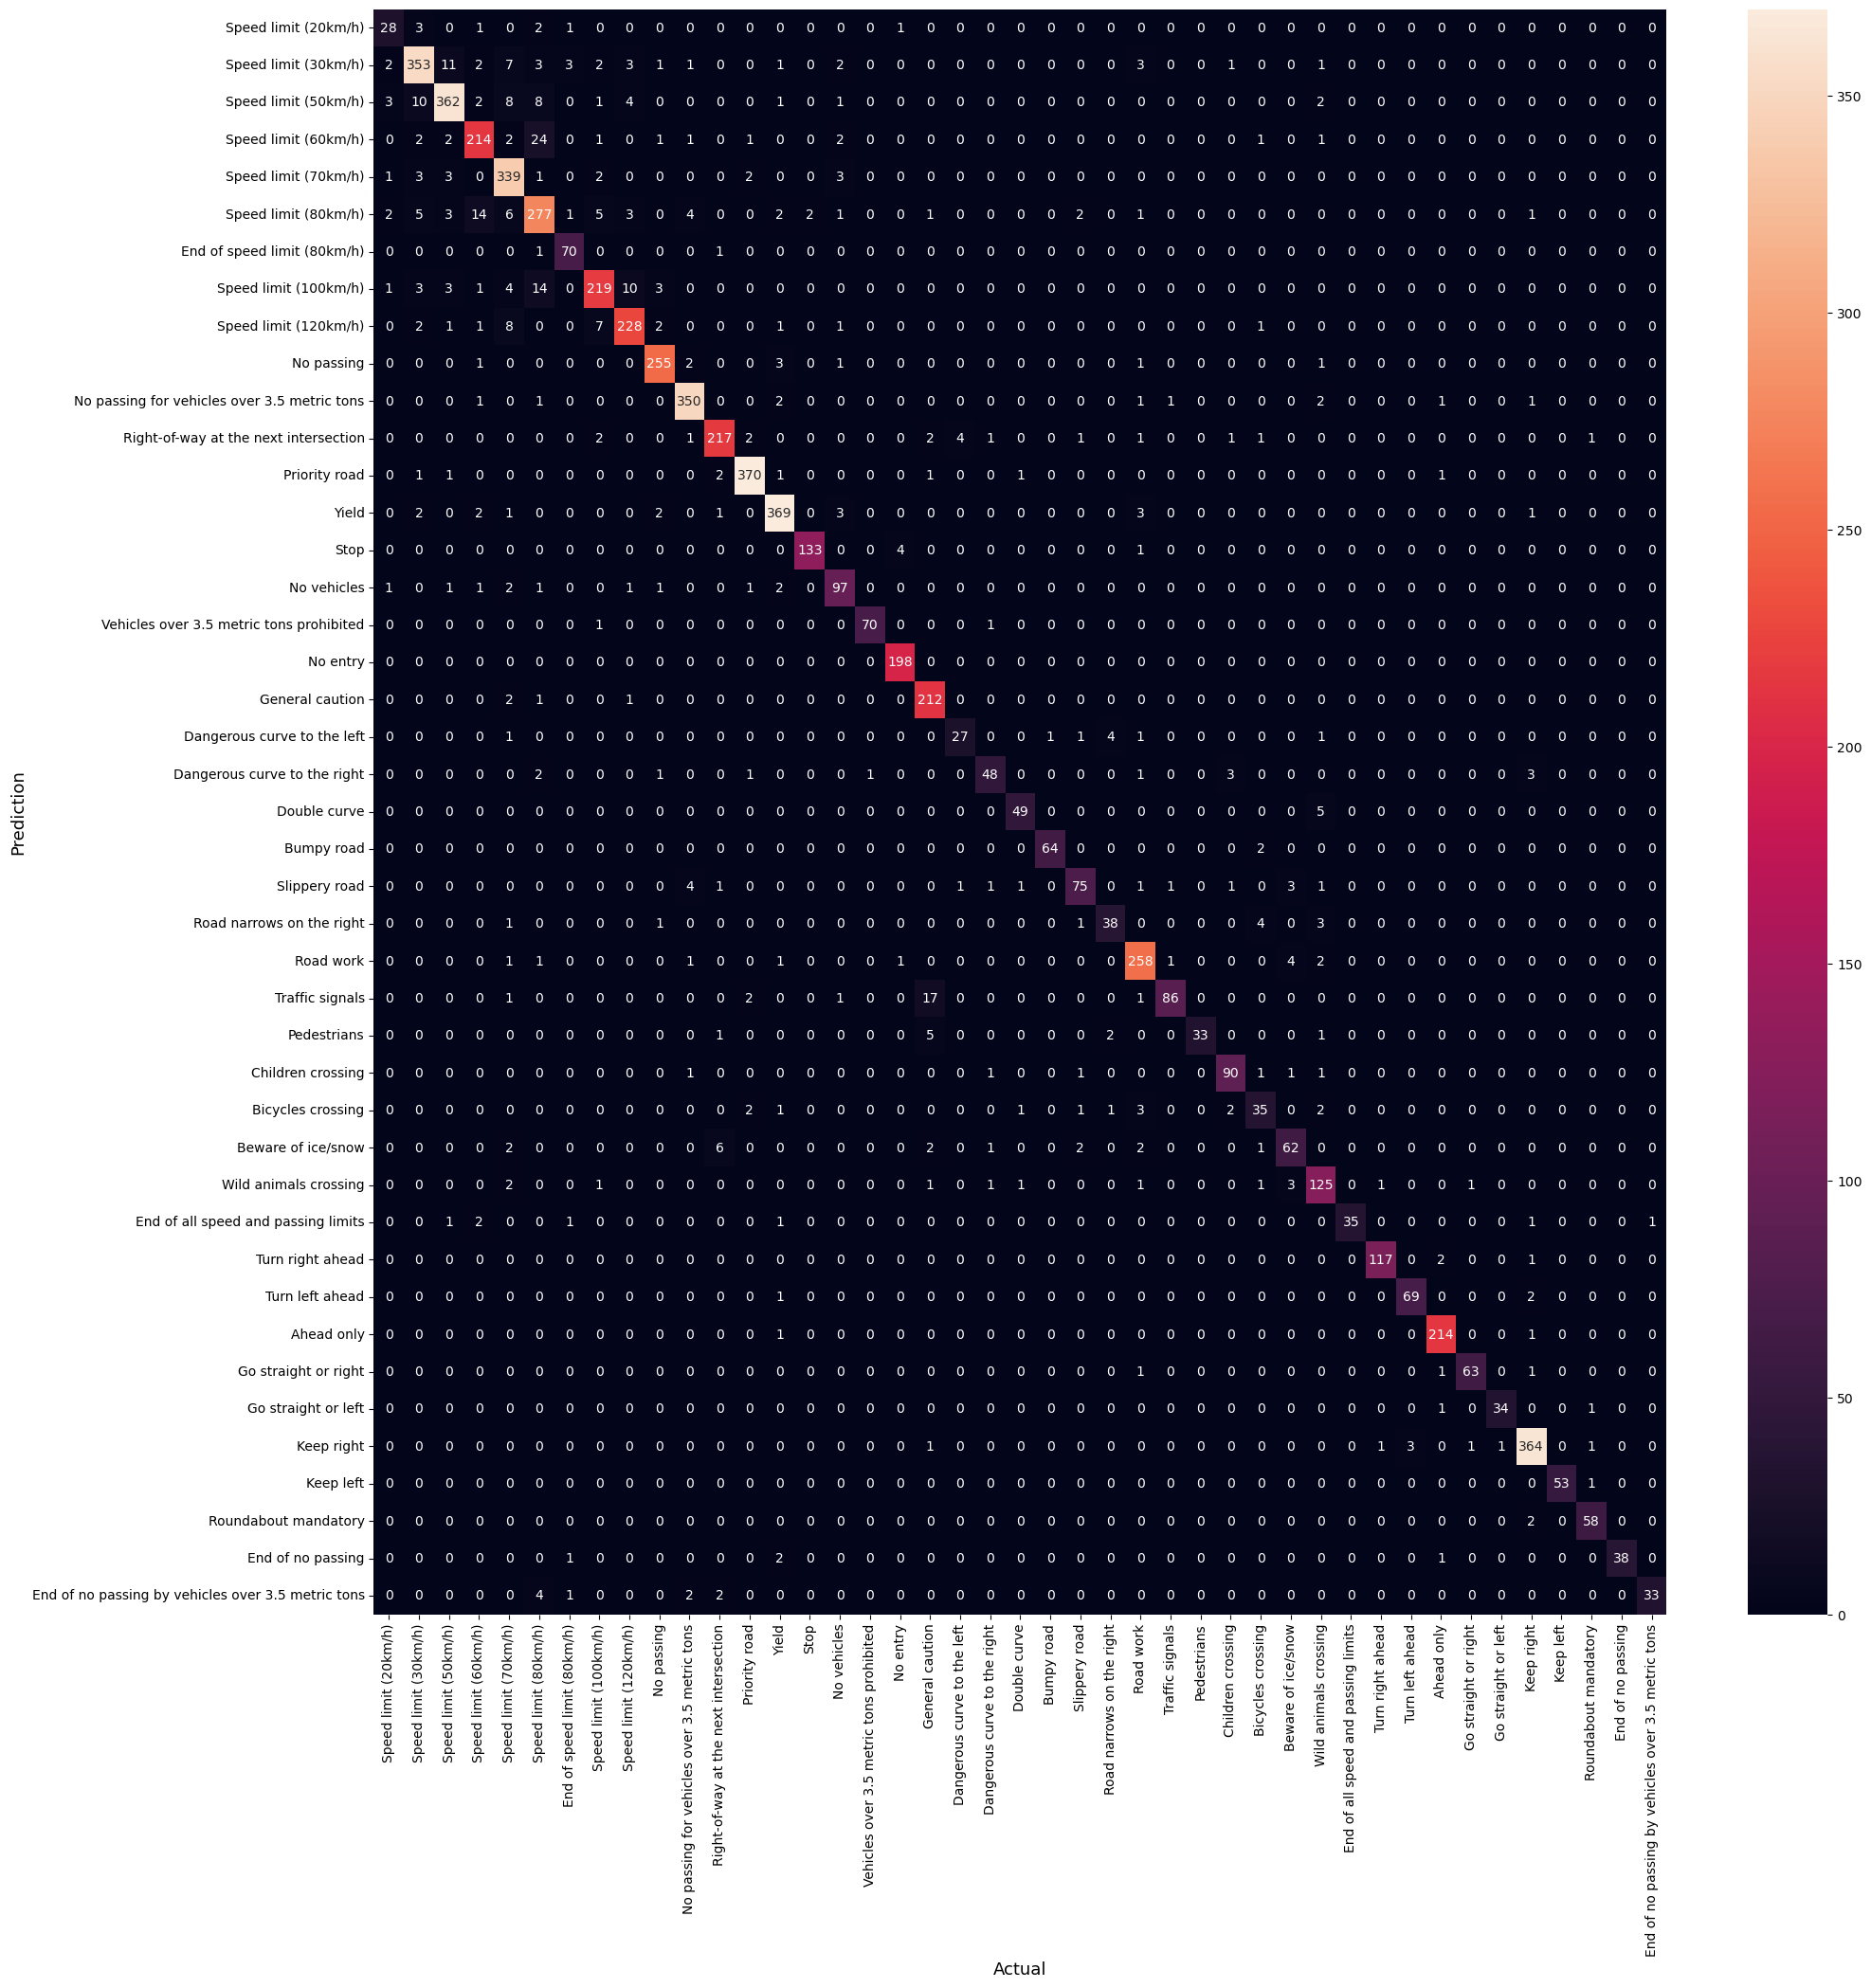

In [4]:
cm = confusion_matrix(y_test,lr_pred)
plt.figure(figsize = (22,22))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=names, yticklabels=names)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

Таким образом чаще всего путает speed limit 60 и 80, что понятно.

2.

In [5]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)
knn_pred = knn_model.predict(x_test.reshape(x_test.shape[0], -1))
f1_score(knn_pred, y_test, average='weighted')

0.9332715571352665

In [6]:
from sklearn.naive_bayes import MultinomialNB


mnb_model = MultinomialNB()
mnb_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)
mnb_pred = mnb_model.predict(x_test.reshape(x_test.shape[0], -1))
f1_score(mnb_pred, y_test, average='weighted')

0.2988589989548405

In [7]:
from sklearn.svm import SVC


lc_svm_model = SVC(kernel='linear')
lc_svm_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)
lc_svm_pred = lc_svm_model.predict(x_test.reshape(x_test.shape[0], -1))
f1_score(lc_svm_pred, y_test, average='weighted')

0.9633696255661877

In [9]:
pc_svm_model = SVC(kernel='poly', max_iter=100)
pc_svm_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)
pc_svm_pred = pc_svm_model.predict(x_test.reshape(x_test.shape[0], -1))
f1_score(pc_svm_pred, y_test, average='weighted')

/home/sohatiy/miniconda3/envs/classical-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.23363934214468599

In [10]:
rbfc_svm_model = SVC(kernel='rbf', max_iter=100)
rbfc_svm_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)
rbfc_svm_pred = rbfc_svm_model.predict(x_test.reshape(x_test.shape[0], -1))
f1_score(rbfc_svm_pred, y_test, average='weighted')

/home/sohatiy/miniconda3/envs/classical-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.46732463503650323

Таким образом лучше всего отработала SVC с linear ядром. Хуже всего отработали НБК и SVC с poly ядром, первая из-за того что признаки у нас зависимые, вторая из-за недостаточного количества итераций (кажется когда я запускал без ограничений результат был средненьким а не ужасным).